## EE361M Introduction to Data Mining - Assignment #4
## Rohan Nagar, Wenyang Fu, Zuhair Parvez

# Question 1 (1+2+1+2+3+3+3=15 points) - Decision Trees 

For this question, we will be using the housing dataset. To make our lives easier, we will be using the pydataset package, which can be installed with 'pip install pydataset'. Pydataset allows us to easily access a lot of datasets. The data can then be accessed as a pandas dataframe as 'df = data('Housing'). See code below.

1. Create price_01 as 1 when price > than the median price and zero otherwise. This will be the class we are now trying to predict.
1. Convert driveway, recroom, fullbase, gashw, airco, and prefarea to numeric dummy variables (1 for yes, zero for no)
2. Split the data into training and testing with a random seed of 42 and keeping 1/3rd of the data for testing
2. Fit a [decision tree classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to predict price_01 using bedrooms, bathrms, and fullbase on the training data.
4. Use [export_graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) to visualize the tree. Embed the visualization in your notebook. Comment on the tree - what variables are important? What sequence of decisions (splits) leads to the most likey to get a price_01 of 1 and 0? This problem will require installing [graph viz](http://www.graphviz.org/Download..php).
5. Plot the ROC curve and display the area under the curve score on the test data. For the ROC curve and AUC you will need to get the predicted probabilities (rather than predicting just the class label) using predict_proba() instead of predict().
6. How can decision trees protect against overfitting? And how does the tree decide on a splitting point?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pydataset import data
df = data('Housing')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500,4000,2,1,1,yes,no,no,no,no,0,no
3,49500,3060,3,1,1,yes,no,no,no,no,0,no
4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000,6360,2,1,1,yes,no,no,no,no,0,no


# Answers
### Question 1.1

In [3]:
median_price = np.median(df['price'])
print(median_price)
df['price_01'] = np.where(df['price'] > median_price, 1, 0)
df.head()

62000.0


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,price_01
1,42000,5850,3,1,2,yes,no,yes,no,no,1,no,0
2,38500,4000,2,1,1,yes,no,no,no,no,0,no,0
3,49500,3060,3,1,1,yes,no,no,no,no,0,no,0
4,60500,6650,3,1,2,yes,yes,no,no,no,0,no,0
5,61000,6360,2,1,1,yes,no,no,no,no,0,no,0


### Question 1.2

In [4]:
def yes_no_to_dummy(b):
    if type(b) is str: return 1 if b == 'yes' else 0
    else: return b

to_dummyify = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
for feature in to_dummyify: df[feature] = df[feature].apply(yes_no_to_dummy)
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,price_01
1,42000,5850,3,1,2,1,0,1,0,0,1,0,0
2,38500,4000,2,1,1,1,0,0,0,0,0,0,0
3,49500,3060,3,1,1,1,0,0,0,0,0,0,0
4,60500,6650,3,1,2,1,1,0,0,0,0,0,0
5,61000,6360,2,1,1,1,0,0,0,0,0,0,0


### Question 1.3

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, df['price_01'], test_size=0.33, random_state=42)

### Question 1.4

In [6]:
from sklearn.tree import DecisionTreeClassifier

features = ['bedrooms', 'bathrms', 'fullbase']
train_input = X_train[features]
test_input = X_test[features]

classifier = DecisionTreeClassifier()
classifier = classifier.fit(train_input, Y_train)

### Question 1.5

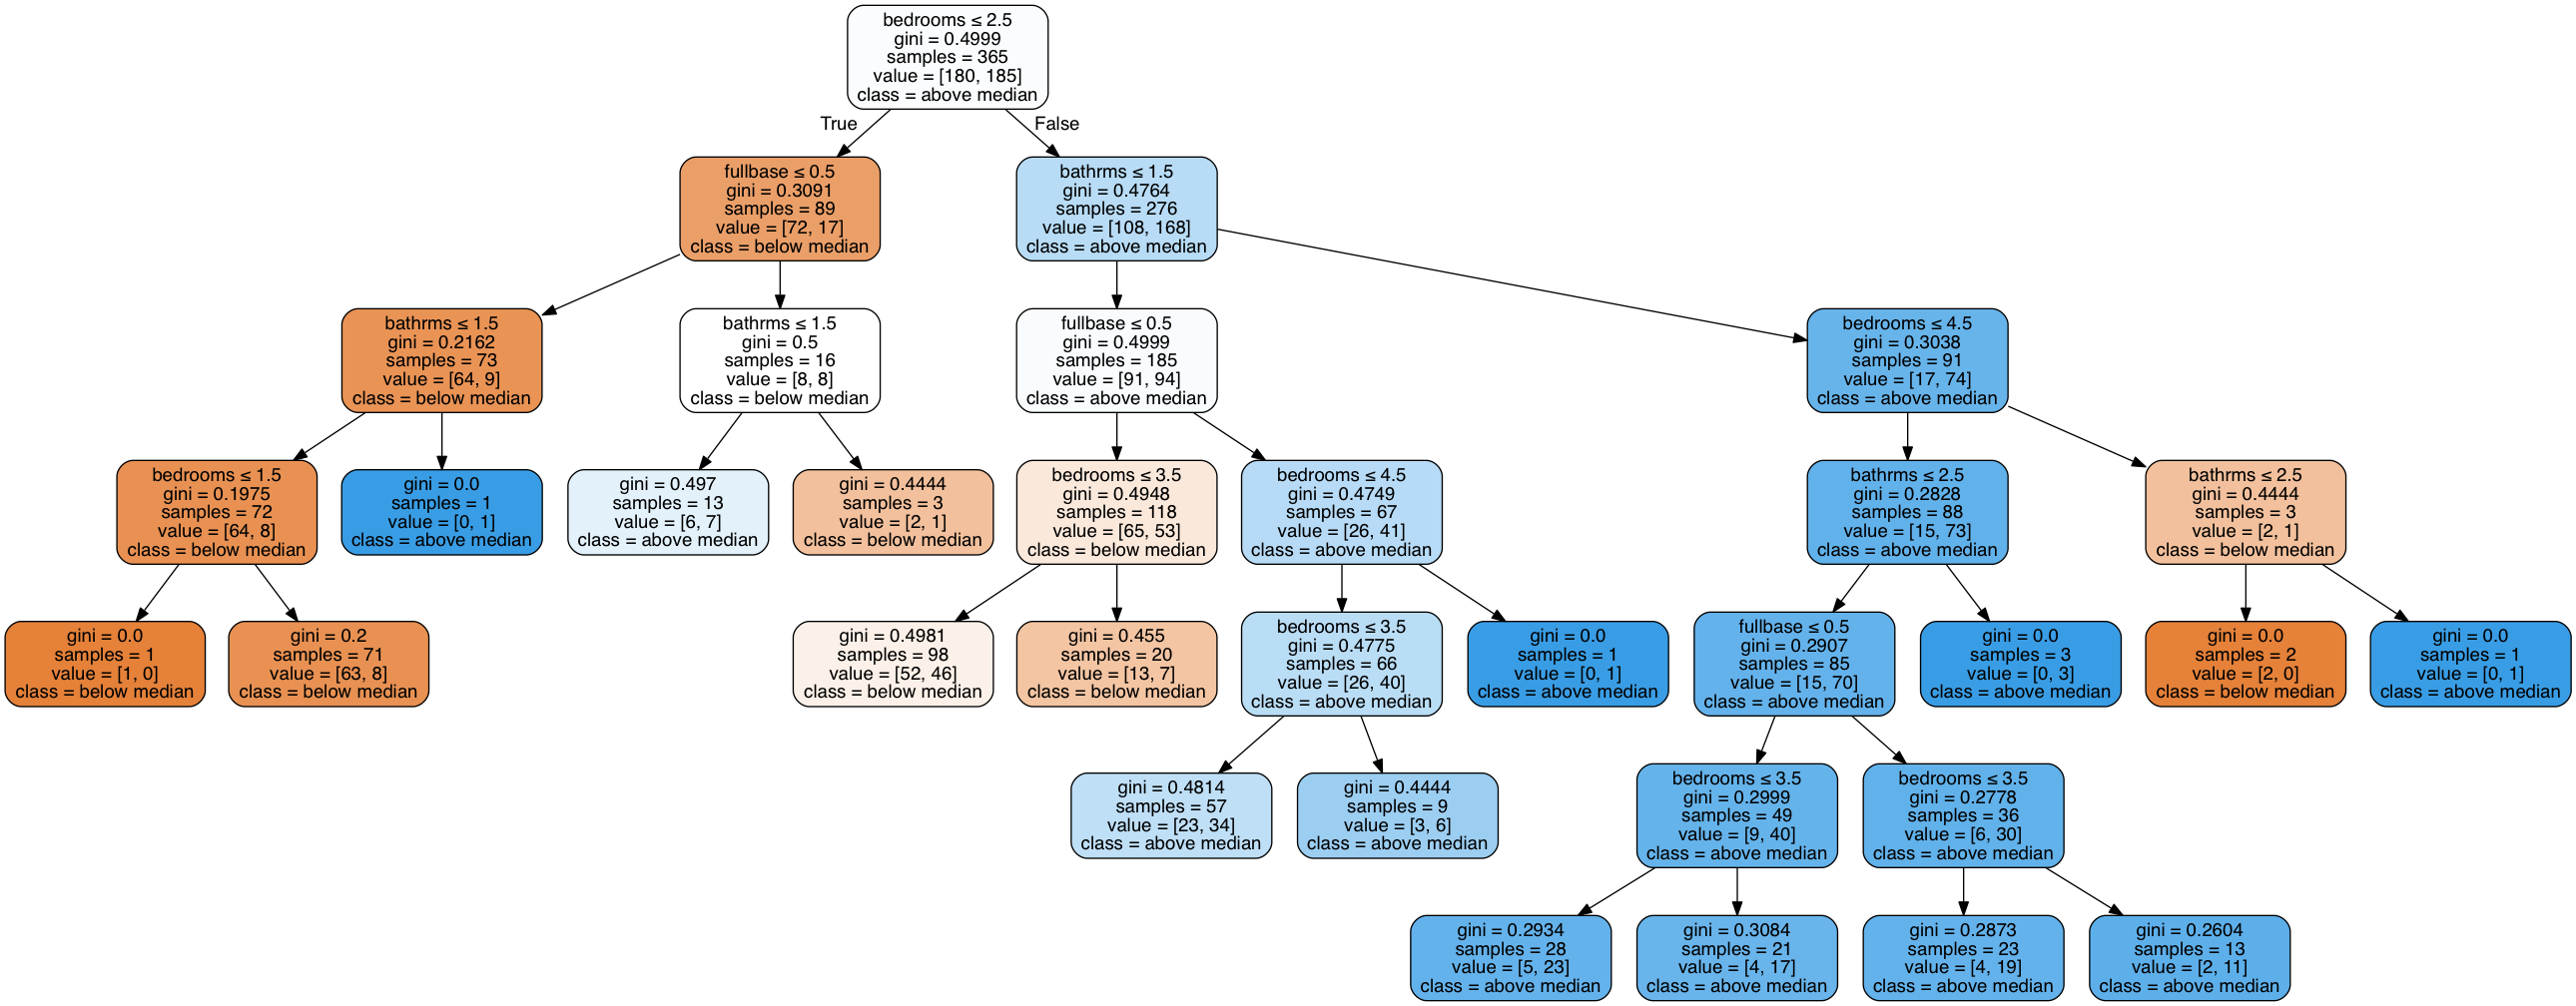

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(classifier, 'decision_tree.dot', 
                feature_names=train_input.columns, 
                class_names=['below median','above median'], 
                filled=True, rounded=True, special_characters=True
)

# Manually converted .dot to .png

from IPython.display import Image
Image(filename='decision_tree.png')

# TODO: Explain the tree

### Question 1.6

In [8]:
from sklearn.metrics import roc_curve, auc

Y_score = classifier.predict_proba(test_input)

Y_scores_positive = Y_score[:,1]
false_positive, true_positive, thresholds = roc_curve(Y_test, Y_scores_positive)
roc_auc = auc(false_positive, true_positive)

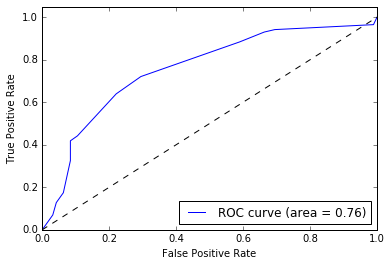

In [9]:
# Based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plt.figure()
plt.plot(false_positive, true_positive, label='ROC curve (area = %.02f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Question 1.7

There are a few ways to protect against overfitting. One of these ways is by using a validation set and pruning. As you try fitting different models you can run the model on the validation set to see how accurate the model is. This can also allow you to remove nodes from the decision tree after the tree is built if the effect on the validation set accuracy is not negative. This removal of nodes from the tree is called pruning, and is often done with decision trees to help against overfitting. Pruning is usually the most common method to help avoid overfitting.

Another method is to use the Minimum Description Length principle. This measures the complexity of the tree and the goal is to minimize the encoding size `size(tree) + size(misclassifications(tree))` and stop the growth of the tree when that value is minimized.

# TODO: How does the decision tree decide on a splitting point?

# Question 2 (5+5=10 points) - Bayes Decision Rule

1. Suppose points in $\mathbb{R}^2$ are being obtained 
from two classes, C1 and C2, both of which are normally distributed with means at 
(2,0) and (0,2) respectively.  The covariance matrix for both classes is the (2x2) identity matrix.
If the priors of C1 and C2 are 1/5 and 4/5 respectively, what is the 
ideal (i.e. Bayes Optimal) decision boundary (derive the equation for this boundary)?
2. Suppose the cost of misclassifying an input actually belonging to C1 is 
twice as  expensive as  misclassifying
an input belonging to C2. Correct classification does not incur any cost.
If the objective is to minimize the expected cost rather than
expected misclassification rate, what would be the best decision boundary?
(obtain the equation that describes this boundary).

# Answers
### Question 2.1

### Question 2.2

# Question 3 (1+3+1+3+2+2+3=15 points) - Naive Bayes, LDA & QDA

For this problem, we will be using the California School dataset, which can be imported using pydataset (See code below).

1. Create a binary variable, test_score_01, that contains a 1 if testscr contains a value above its median, and a 0 otherwise.
2. Explore the data graphically in order to investigate the association between test_score_01 and the other features. Which of the other features seem most likely to be useful in predicting total_score_01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.
3. Split the data into training and testing with random state of 42 and keeping 1/3rd of the data for testing. X should include ['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'avginc'] as fectures. Your dependent variable, y, is test_score_01.
4. Perform Naive Bayes (see sklearn) on the training data. Plot the ROC curve and display the area under the curve score on the test data. For the ROC curve and AUC you will need to get the predicted probabilities (rather than predicting just the class label) using predict_proba() instead of predict().
5. Repeat the same steps as in 4 with LDA. Scikit has code for both LDA and QDA.
6. Repeat the same steps as in 4 with QDA.
7. Explain the differences between Naive Bayes, LDA, and QDA. Why do you think the model with the best AUC performed the best?

In [10]:
df = data('Caschool')
df.head()

,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


# Answers
### Question 3.1

In [11]:
median_score = np.median(df['testscr'])
print(median_score)
df['test_score_01'] = np.where(df['testscr'] > median_score, 1, 0)
df.head()

654.449981689


,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr,test_score_01
1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,1
2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,1
3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,0
4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,0
5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024,0


In [12]:
positive_set = df.loc[df['test_score_01'] == 1]
negative_set = df.loc[df['test_score_01'] == 0]

### Question 3.2

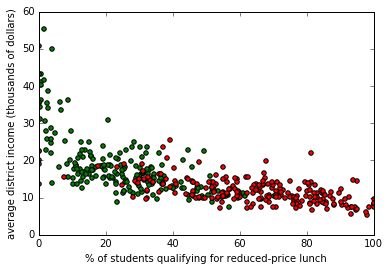

In [13]:
plt.figure()
plt.xlim([0,100])
plt.xlabel('% of students qualifying for reduced-price lunch')
plt.ylabel('average district income (thousands of dollars)')
plt.scatter(positive_set['mealpct'], positive_set['avginc'], c='g')
plt.scatter(negative_set['mealpct'], negative_set['avginc'], c='r')
plt.show()

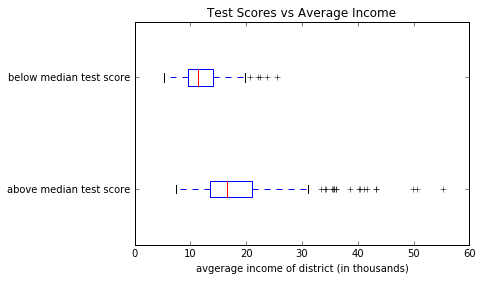

In [14]:
plt.figure()
plt.title('Test Scores vs Average Income')
plt.xlabel('avgerage income of district (in thousands)')
plt.boxplot(
    [positive_set['avginc'].values, negative_set['avginc'].values],
    vert=False,
    labels=['above median test score', 'below median test score']
)
plt.show()

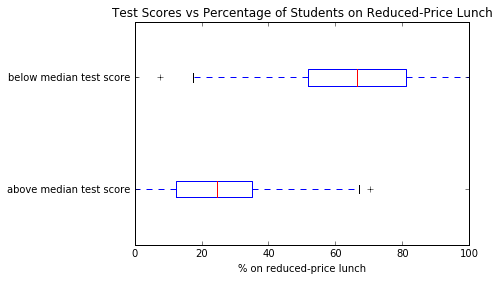

In [15]:
plt.figure()
plt.title('Test Scores vs Percentage of Students on Reduced-Price Lunch')
plt.xlabel('% on reduced-price lunch')
plt.boxplot(
    [positive_set['mealpct'].values, negative_set['mealpct'].values],
    vert=False,
    labels=['above median test score', 'below median test score']
)
plt.show()

#### Findings:

Schools with a higher percentage of students on reduced-price lunch tend to be below the median test score. Less drastically, but still pronounced, schools in richer districts tend to have scores above the median test score. These features are likely to be useful in predicting total_score_01.

### Question 3.3

In [16]:
features = ['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'avginc']
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df['test_score_01'], test_size=0.33, random_state=42)

### Question 3.4

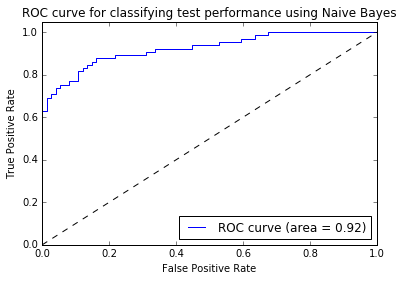

In [17]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes = naive_bayes.fit(X_train, Y_train)

naive_bayes_score = naive_bayes.predict_proba(X_test)
naive_bayes_positive = naive_bayes_score[:,1]

false_positive, true_positive, thresholds = roc_curve(Y_test, naive_bayes_positive)
roc_auc = auc(false_positive, true_positive)

# Based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plt.figure()
plt.title('ROC curve for classifying test performance using Naive Bayes')
plt.plot(false_positive, true_positive, label='ROC curve (area = %.02f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


### Question 3.5

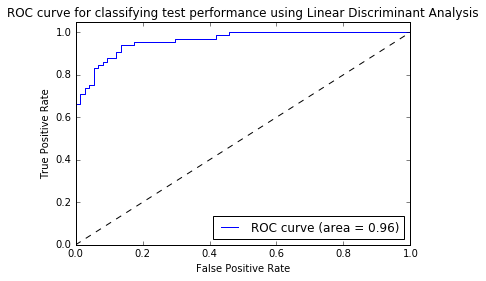

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier = lda_classifier.fit(X_train, Y_train)

lda_score = lda_classifier.predict_proba(X_test)
lda_positive = lda_score[:,1]

false_positive, true_positive, thresholds = roc_curve(Y_test, lda_positive)
roc_auc = auc(false_positive, true_positive)

# Based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plt.figure()
plt.title('ROC curve for classifying test performance using Linear Discriminant Analysis')
plt.plot(false_positive, true_positive, label='ROC curve (area = %.02f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Question 3.6

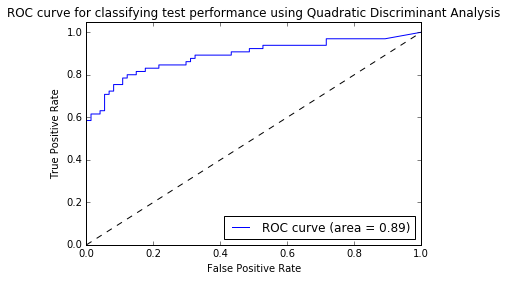

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier = qda_classifier.fit(X_train, Y_train)

qda_score = qda_classifier.predict_proba(X_test)
qda_positive = qda_score[:,1]

false_positive, true_positive, thresholds = roc_curve(Y_test, qda_positive)
roc_auc = auc(false_positive, true_positive)

# Based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plt.figure()
plt.title('ROC curve for classifying test performance using Quadratic Discriminant Analysis')
plt.plot(false_positive, true_positive, label='ROC curve (area = %.02f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Question 3.7

With Naive Bayes, the key assumption is that all of the features are independent of each other, conditioned on the class. This "naive" assumption allows us to save on a large number of estimations. With this, we can compute the likelihood function more easily, since the joint function is now just a product of each individual function. That is,

$$p(x\: |\: C_{i}) = \prod^{d}_{j=1} p(x_{j}\: |\: C_{i})$$

QDA is analysis using the Bayes Decision Theory. With this, we predict points as being from class 1 if the posterior probability of class 1: $P(C_{1}\: |\: x)$ is greater than the posterior of class 2: $P(C_{2}\: |\: x)$. Otherwise it is from class 2. This is classic Bayes Decision Theory. The key assumption is that the conditional likelihood pdfs $p(x\: |\: C_{1})$ and $p(x\: |\: C_{2})$ are both normally distributed.

With LDA, or Linear Discriminant Analysis, we do an estimate with a pooled covariance. This takes advantage of the fact that with the same covariance you have a linear decision boundary. This is the difference from QDA - the assumption that the covaraince matricies are the same, which allows many terms to cancel in the mathematical calculations, and thus we simply have a linear combination.

In our models above, LDA could have performed the best beacuse the covariance matricies for both classes were very similar. This would mean that the true model would be linear, and we could better estimate it using a linear model which LDA would give us. We can also think about why the other models didn't do as well. Naive Bayes probably didn't do so well beacuse the assumption that features are independent conditioned on the class may not be accurate in this situation. Also, with QDA, it tends to do better when we have a large amount to data to train the model. In this case, we didn't have a huge dataset, so QDA may not have performed as well.

# Question 4 (3+2+5=10 points) - Bayesian Network

In the Bayesian network shown below, B stands for `Battery', F for 'Fuel', G for 'Gauge', and S for 'Start'. Compute the following probabilities:

1. P(B = bad, F = not empty, G = empty, S = no)
2. P(B = good, F = empty, G = empty, S = no)
3. Given that the fuel is empty, compute the probability that the car will start.

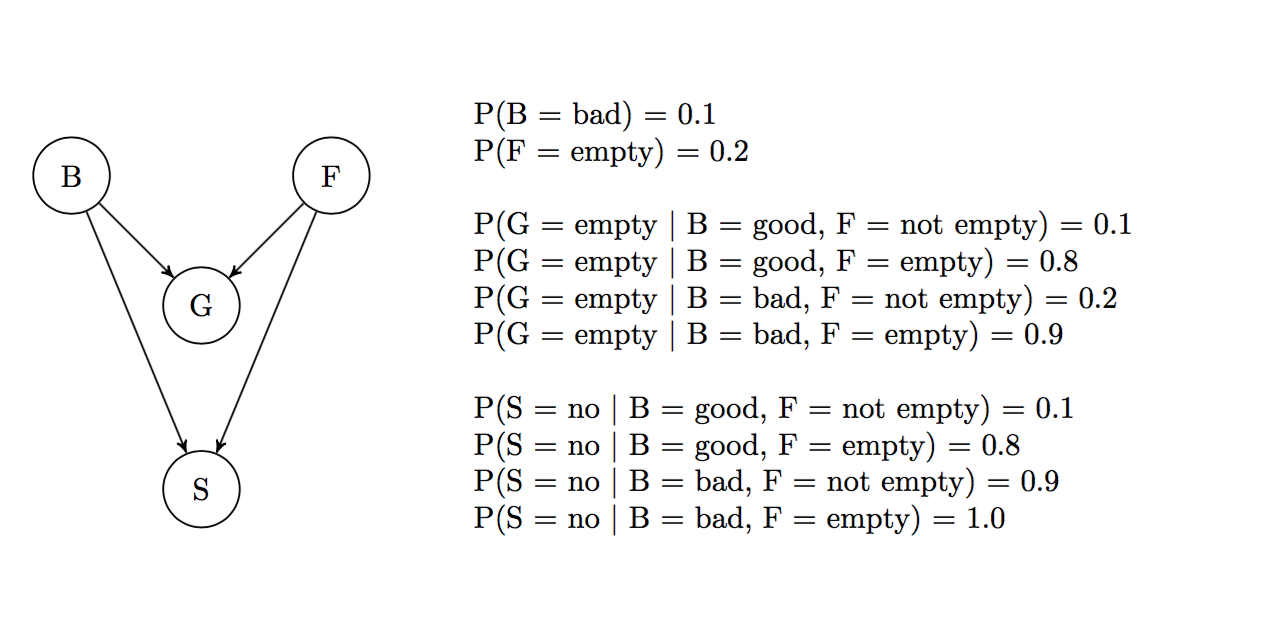

In [20]:
from IPython.display import Image
Image(filename='bbn.png') 

# Answers
### Question 4.1

Find $P(B = bad,\: F = not\: empty,\: G = empty,\: S = no)$.

First, we know that B and F are independent from each other. Since we know that $P(B = bad) = 0.1$ and that $P(F = not\: empty) = 0.8$, we know that:

$$P(B = bad,\: F = not\: empty) = P(B = bad) * P(F = not\: empty) = 0.1 * 0.8 = 0.008$$

We also know that S and G are independent from each other, but both are dependent on B and F. We know the following quantities:

$$P(G = empty\; |\; B = bad,\: F = not\: empty) = 0.2$$

$$P(S = no\; |\; B = bad,\: F = not\: empty) = 0.9$$

So, we can determine that:

$$P(G = empty,\: S = no\; |\; B = bad,\: F = not\: empty) = P(G = empty\; |\; B = bad,\: F = not\: empty) * P(S = no\; |\; B = bad,\: F = not\: empty)$$

$$= 0.2 * 0.9 = 0.18$$

Finally, we know that $P(A \cap B) = P(A) * P(B\; |\; A)$. This means that:

$$P(B = bad,\: F = not\: empty,\: G = empty,\: S = no) = P((B = bad,\: F = not\: empty) \cap (G = empty,\: S = no))$$

$$= P(G = empty,\: S = no\; |\; B = bad,\: F = not\: empty) * P(B = bad,\: F = not\: empty)$$

$$= 0.18 * 0.008$$

$$= 0.00144$$

### Question 4.2

Find $P(B = good,\: F = empty,\: G = empty,\: S = no)$.

Again, we can follow a similar pattern as in part 1. We know that $P(B = good) = 0.9$ and $P(F = empty) = 0.2$. This gives us:

$$P(B = good,\: F = empty) = P(B = good) * P(F = empty) = 0.9 * 0.2 = 0.18$$

We also know these quantities:

$$P(G = empty\; |\; B = good,\: F = empty) = 0.8$$

$$P(S = no\; |\; B = good,\: F = empty) = 0.8$$

This gives us:

$$P(G = empty,\: S = no\; |\; B = good,\: F = empty) = P(G = empty\; |\; B = good,\: F = empty) * P(S = no\; |\; B = good,\: F = empty)$$

$$= 0.8 * 0.8 = 0.64$$

Finally, we can combine these to give us the answer:

$$P(B = good,\: F = empty,\: G = empty,\: S = no) = P((B = good,\: F = empty) \cap (G = empty,\: S = no))$$

$$= P(G = empty,\: S = no\; |\; B = good,\: F = empty) * P(B = good,\: F = empty)$$

$$= 0.18 * 0.64$$

$$= 0.1152$$

### Question 4.3

Find $P(S = yes\; |\; F = empty)$.

Since S does not depend on G, we can ignore G in this problem. Also, since we only care about finding out the probability of $S = yes$ given that $F = empty$, we want to consider the cases when both $B = bad$ and $B = good$. From the given quantities, we can find the probabilities for the following quantities:

$$P(S = yes\; |\; B = bad,\: F = empty) = 1 - P(S = no\; |\; B = bad,\: F = empty) = 0.0$$

$$P(S = yes\; |\; B = good,\: F = empty) = 1 - P(S = no\; |\; B = good,\: F = empty) = 0.2$$

# TODO: Need to finish this question.. not exactly sure where to go from here.